# Ryan Tschritter

## Revised Research question/interests

1. **Find the most significantly correlated statistics (and their respective p-values) and assemble them into a scoring model by weight that can predict a players contribution to their team in the next season**

This would have two heatmaps for the correlation and p-values and using a correlation of above 0.5 and a p-value below 0.5 I should be able to then assemble a weighted model that uses higher correlated values to predict a players performance.

2. **Perform the same analysis above but generate a model that shows a player in on the decline**

## Analysis Plan

1. Generate correlation matrix for all columns of data
2. Generate a p-value matrix for the correlation matrix
3. Remove the correlations that have a value below 0.5
4. Remove the p-values above 0.5
6. Create a weighted model using the final correlated statistics for both positive contribution and negative
8. Run the original data though the model and show that it predicts performance corretly

### Old Research Questions

```
1. To find the pearson correlation coefficients for each statistic relative to goals scored in the current/next season.

To find the coefficients I only need to follow the peason correlation coefficient formula and calculate the coefficient. This would mean calculating the means and sums of each statistic and then entering them into the formula.

2. To find the largest correlation coefficient and plot that statistic against goals scored in the current/next season.

From the results of the question above I would be able to pick the statistic with the highest correlation  and graph that statistic against goals scored in the current and next seasons.
```

In [247]:
# Milestone 2 Task 2 - Import the data into a dataframe using pandas
import pandas as pd
nhl2017 = pd.read_csv('../data/processed/Data301ProjectData2017.csv')
nhl2018 = pd.read_csv('../data/processed/Data301ProjectData2018.csv')

---
## Milestone 3 Task 1 - Exploratory Data Analysis

In [248]:
# Import Python Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [249]:
# Import Data CSV File for merged data
nhl = pd.read_csv('../data/processed/merged.csv')

In [250]:
# View the shape of the dataframes (ie. the number of columns and rows)
fstring = f"The shape of the merged dataframe is {nhl.shape}."
print(fstring)

The shape of the merged dataframe is (225, 37).


In [251]:
nhl.head()

,Name,Rk_2017,GP_2017,G_2017,A_2017,P_2017,PIM_2017,+/-_2017,TOI_2017,PPG_2017,...,PPG_2018,GWG_2018,PPP_2018,G/GP_2018,A/GP_2018,P/GP_2018,SHOTS_2018,SH%_2018,HITS_2018,BS_2018
0,Aaron Ekblad,185.0,82.0,16.0,22.0,38.0,71.0,9.0,1402.0,5.0,...,5.0,1.0,10.0,0.159,0.293,0.451,180.0,7.2,114.0,88.0
1,Adam Henrique,115.0,81.0,24.0,26.0,50.0,20.0,11.0,1066.0,6.0,...,8.0,3.0,13.0,0.220,0.293,0.512,122.0,14.8,78.0,71.0
2,Adrian Kempe,193.0,81.0,16.0,21.0,37.0,49.0,11.0,799.0,1.0,...,0.0,2.0,4.0,0.148,0.198,0.346,118.0,10.2,86.0,21.0
3,Aleksander Barkov,25.0,79.0,27.0,51.0,78.0,14.0,9.0,1324.0,5.0,...,13.0,5.0,31.0,0.427,0.744,1.171,206.0,17.0,28.0,61.0
4,Alex DeBrincat,102.0,82.0,28.0,24.0,52.0,6.0,6.0,888.0,6.0,...,13.0,3.0,24.0,0.500,0.427,0.927,220.0,18.6,35.0,26.0


## Legend for Columns of Dataframes

|Acronym|Meaning|
|---|---|
|Rk|Rank In List|
|GP|Games Played|
|G|Goals Scored|
|A|Assists|
|P|Points|
|Pim|Penalty Minutes|
|+/-|Plus Minus|
|TOI|Average Time on Ice|
|PPG|Power-Play Goals|
|GWG|Game-Winning Goals|
|PPP|Power-Play Points|
|G/GP|Goals Per Game Played|
|A/GP|Assists Per Game Played|
|P/GP|Points Per Game Played|
|SHOTS|Shots On Goal|
|SH%|Shot Percentage|
|HITS|Hits|
|BS|Blocked Shots|


In [252]:
nhl.describe().T

,count,mean,std,min,25%,50%,75%,max
Rk_2017,225.0,119.337778,71.573274,1.000,57.000,119.000,179.000,250.000
GP_2017,225.0,76.871111,6.997213,44.000,74.000,80.000,82.000,82.000
G_2017,225.0,20.382222,8.879935,5.000,14.000,19.000,25.000,49.000
A_2017,225.0,32.933333,12.503571,13.000,23.000,31.000,41.000,68.000
P_2017,225.0,53.315556,16.995876,32.000,40.000,49.000,64.000,108.000
PIM_2017,225.0,33.915556,20.680973,2.000,20.000,30.000,43.000,187.000
+/-_2017,225.0,2.457778,14.962430,-42.000,-6.000,2.000,11.000,49.000
TOI_2017,225.0,1118.088889,180.818331,747.000,988.000,1087.000,1208.000,1609.000
PPG_2017,225.0,5.413333,3.718054,0.000,3.000,5.000,7.000,20.000
GWG_2017,225.0,3.324444,2.174646,0.000,2.000,3.000,4.000,12.000


## Comments about the dataframe describe

- Some of the mean statistics for 2017 and 2018 are very close, such as the time on ice (TOI)
- When averages and data is simmilar between seasons like this, other analysis methods such as standard deviation become more important

In [253]:
# Global plot settings
sns.set(style = "dark")

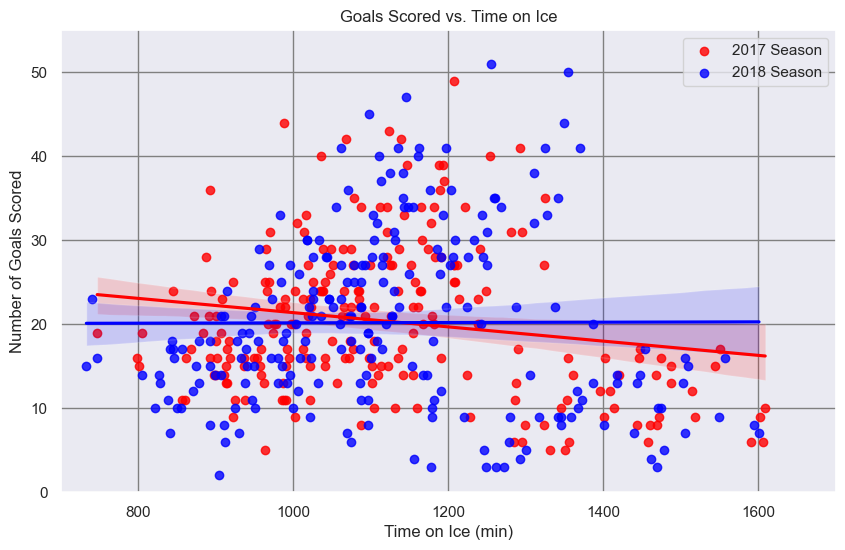

In [254]:
# Plot 1
plot1 = plt.figure(figsize = (10,6))
plot1 = plt.grid(axis='both', color='0.5')
plot1 = sns.regplot(data = nhl, x = "TOI_2017", y = "G_2017", color = "red", label = "2017 Season")
plot1 = sns.regplot(data = nhl, x = "TOI_2018", y = "G_2018", color = "blue", label = "2018 Season")
plot1.set(xlabel ="Time on Ice (min)", ylabel = "Number of Goals Scored", title ="Goals Scored vs. Time on Ice", xlim = (700,1700), ylim = (0,55))
plot1.legend()

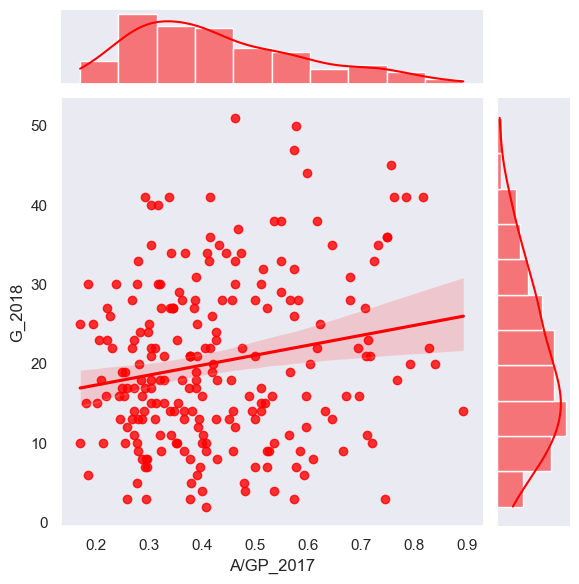

In [255]:
# Plot 2
plot2 = sns.jointplot(data = nhl, x = "A/GP_2017", y = "G_2018", kind = "reg", color = "red")

C:\Users\Ryan\AppData\Local\Temp\ipykernel_11880\219492821.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  nhl_matrix = nhl.corr()


<AxesSubplot:>

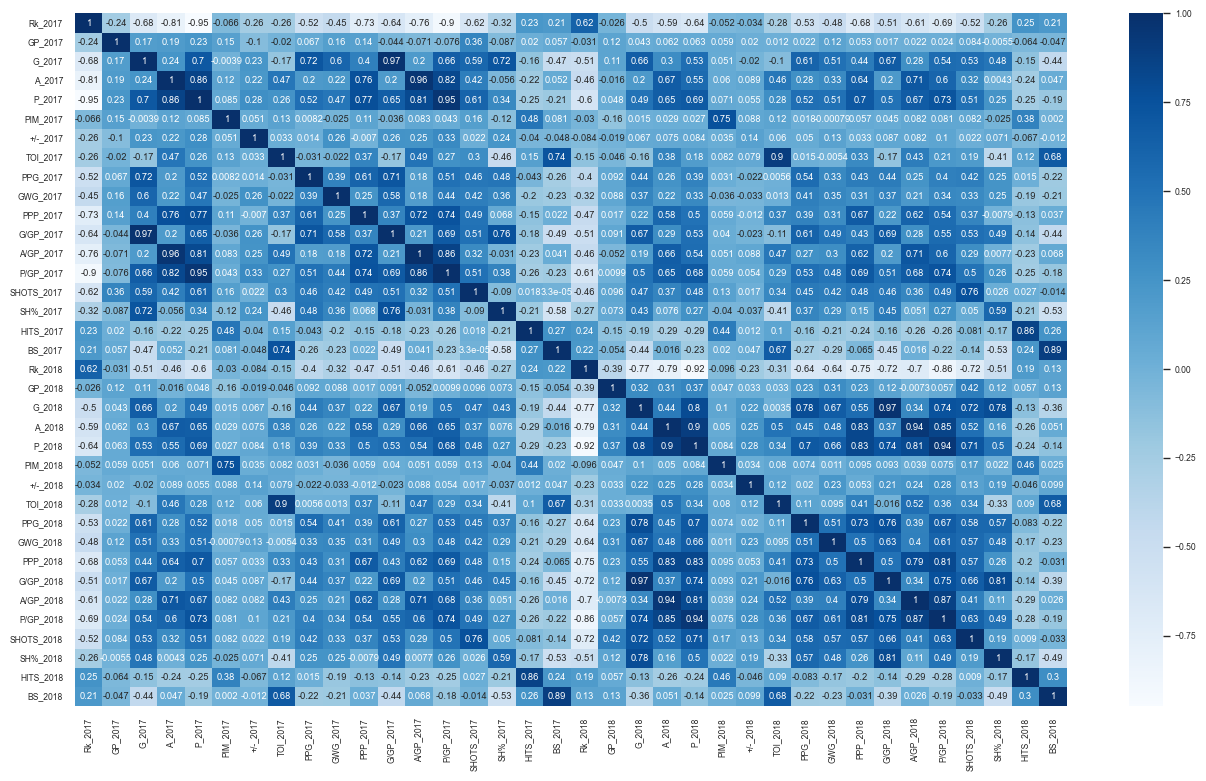

In [256]:
# Plot 3
plt.figure(figsize = (16,9))
sns.set_context('paper', font_scale=0.7)
nhl_matrix = nhl.corr()
sns.heatmap(nhl_matrix, annot=True, cmap='Blues')

## Some notes about Visualizations

- Was expecting a positive correlation between time on ice and goals score but there wasn't, possibly even a negative correlation
- There is a slight trend with the assists in the previous season leading to more goals in the next season
- The corelation matrix shows how the statistics are corelated with eachother, this partially anwsers one my research questions